<a href="https://colab.research.google.com/github/Yash1289/Book_Recommendations/blob/main/Book_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Recommender System**

### A Recommendation engine is a system capable of predicting a user's future preference for a set of items and recommending the top items. In today's world, every customer is faced with multiple choices due to the prevalence of the internet as compared to 30-35 years back when we used to shop in physical stores, where the choices were somewhat limited. Netflix, for example, has an enormous collection of movies, so people need help selecting the items they want to see; this is where the recommender system comes in. It learns from the data and provides a recommendation to users, without the user explicitly searching for the item, the item is brought automatically by the system.

### In this project, we will use three datasets containing info collected from book-selling websites about books, user ratings and users respectively, and we will try to build a book recommender system out of it that can recommend new books to the user based on their past choices . 

For this project we are going to use
  1. Numpy :- For its linear algebra functions and the advantage it offers over list in terms of speed and memory consumed
  2. Pandas :- This will be our primary data analysis library necessary for almost all of our data manipulations jobs
  3. Matplotlib :- Basic visualization library that we need for plotting and graphs
  4. Seaborn :- For more customizable and advanced data visualization
  5. Sklearn :- For some of the models and tools that we will need to build a recommender system
  6. Surprise :- To get some help in evaluating the recommender system

In [1]:
#Importing the numpy and pandas library
import numpy as np
import pandas as pd

In [2]:
#Mounting the google drive so that we can access the files on it from our colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **We have in total 3 datasets with us namely : books, ratings and users. So, we will start with going through each of them one by one while checking their head, their shapes and treating the null values wherever needed for each of the three datasets.**

### **Books DataSet**

In [3]:
#Reading the books dataset csv file as a pandas dataframe

books_path = "/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Python For DataScience/Book Recommender System/Books.csv"
books_df = pd.read_csv(books_path , low_memory=False)

In [4]:
from google.colab import files

In [5]:
#Checking the head of the books dataframe
books_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [6]:
#Checking the shape of the dataframe
print(books_df.shape)

(271360, 8)


We have details for more than 2.7 lakh books in our dataframe

In [7]:
#Calling info method on the dataframe to print a concise summary 
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


We have 1 null value in Book-Author column, 2 null values in Publisher column and 3 null values in Image-URL-L column

The last three columns are not of any use to us as they only contain url linking to image of books and hence we decided to drop them. 

In [8]:
#Dropping the three url containing column 
books_df.drop(["Image-URL-S" , "Image-URL-M" , "Image-URL-L"] , axis = 1 , inplace = True)

In [9]:
#Checking the unique values we have for Year-Of-Publication column in our database
books_df["Year-Of-Publication"].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

For some of the books the Year of publication date is set in future and for a few of them the value is even zero , also we can notice that for a few books the value is weirdly set to strings like 'DK Publishing Inc' and 'Gallimard', all of these will need further examination and treatment.

In [10]:
#Finding all the observation in which the Year-Of-Publication date is set to "DK Publishing Inc"
books_df[books_df["Year-Of-Publication"] == "DK Publishing Inc"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [11]:
#Finding all the observation in which the Year-Of-Publication date is set to "Gallimard"
books_df[books_df["Year-Of-Publication"] == "Gallimard"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


It is obvious that for these kind of observations where the Year-Of-Publication value is set to a string,  the values are out of place by one position left Starting from Year-Of-Publication column , so we decided to shift all these values by one position right to correct this

In [12]:
#Getting the index of all the observations which have Year-Of-Publication value set to DK Publishing Inc
dk_index = books_df[books_df["Year-Of-Publication"] == "DK Publishing Inc"].index

#Shifting all the out of place values by one place right 
for indexNo in list(dk_index):
  books_df.iloc[indexNo , 2 : ] = books_df.iloc[indexNo , 2 : ].shift()

#Getting the index of all the observation which have Year-Of-Publication value set to Gallimard
dk_index = books_df[books_df["Year-Of-Publication"] == "Gallimard"].index

#Shifting all the out of place values by one place right
for indexNo in list(dk_index):
  books_df.iloc[indexNo , 2 : ] = books_df.iloc[indexNo , 2 : ].shift()

In [13]:
#Changing the data type of Year-Of-Publication columns to integer
books_df["Year-Of-Publication"] = books_df["Year-Of-Publication"].astype(int)

In [14]:
def DecadeDecider(year):

  ''' 
  Function to calculate the decade for any given year 
   '''

  #For books published before 1990 and after 2020 we are setting the decade value to null
  if year > 2020 or year < 1900 :
    return np.nan
  else :
    rem = year%10
    return str(year - rem) + "s"


In [15]:
#Creating a new column named Decade which will indicate the decade in which a particular book was published
books_df["Decade"] = books_df["Year-Of-Publication"].apply(DecadeDecider)
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Decade
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2000s
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,2000s
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,1990s
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,1990s
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,1990s


Changing the values of Book-Title , Book-Author and Publisher columns at first to lower case and then capitalizing the first letter of all the words so to remove any case irregularities 

In [16]:
books_df["Book-Title"] = books_df["Book-Title"].str.lower().str.title()
books_df["Book-Author"] = books_df["Book-Author"].str.lower().str.title()
books_df["Publisher"] = books_df["Publisher"].str.lower().str.title()

In [17]:
#Checking the head of the dataset after all the modifications 
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Decade
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2000s
1,0002005018,Clara Callan,Richard Bruce Wright,2001,Harperflamingo Canada,2000s
2,0060973129,Decision In Normandy,Carlo D'Este,1991,Harperperennial,1990s
3,0374157065,Flu: The Story Of The Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,1990s
4,0393045218,The Mummies Of Urumchi,E. J. W. Barber,1999,W. W. Norton &Amp; Company,1990s


In [18]:
#Finding all the books which have invalid ISBN values 
books_df[books_df["ISBN"].str.len() != 10 ]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Decade
111808,0486404242\t,War In Kind: And Other Poems (Dover Thrift Edi...,Stephen Crane,1998,Dover Publications,1990s
171206,3518365479<90,"Suhrkamp Taschenbã?Â¼Cher, Nr.47, Frost",Thomas Bernhard,1972,Suhrkamp,1970s
251424,3442248027 3,Diamond Age. Die Grenzwelt.,Neal Stephenson,2000,Goldmann,2000s
251649,0385722206 0,Balzac And The Little Chinese Seamstress : A N...,Dai Sijie,2002,Anchor,2000s


### **Users DataSet**

In [19]:
#Reading the Users csv file as a pandas dataframe

users_path = "/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Python For DataScience/Book Recommender System/Users.csv"
users_df = pd.read_csv(users_path , low_memory = False)

In [20]:
#Checking the head of the users dataframe
users_df.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [21]:
users_df.shape

(278858, 3)

In total we have data for more than 2.7 lakh users 

In [22]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


We do have a number of null values in Age column

In [23]:
def locationExtractor(locationsValues , index):

  '''
  Function to extract the city, state and country values from the location values
  Arguments
      - locationsValues (string) : string containing city, state and country values separated by commas
      - index (int) : index of the values we are trying to extract in the splitted string list
  '''

  try:
    h = locationsValues.split(", ")[index]
    if h == "n/a":
      return np.nan
    else:
      return h
  except:
    return np.nan

We are creating three new columns named City, State and Country by passing the value of Location column to the locationExtractor function 

In [24]:
users_df["City"] = users_df["Location"].apply(locationExtractor , args = (0,))
users_df["State"] = users_df["Location"].apply(locationExtractor, args = (1,))
users_df["Country"] = users_df["Location"].apply(locationExtractor , args = (2,))

In [25]:
users_df["Age"].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

We have Age values over 100 and as well as below 10 in our dataset , all of which are extreme outlier keeping in mind the nature of our dataset and hence we will replace all these Age values with zero 

In [26]:
#Replacing all the Age values greater than 100 by 0
users_df["Age"] = np.where(users_df["Age"] > 100 , 0 , users_df["Age"])

#Replacing all the Age values less than 10 by 0
users_df["Age"] = np.where(users_df["Age"] < 10 , 0 , users_df["Age"])

#Filling all the null values of Age Column with zero 
users_df["Age"] = users_df["Age"].fillna(0)

In [27]:
def AgeGroups(age):

  '''Function to determine the Age group given a particular age'''

  if age < 10:
    return np.nan
  elif age <= 12:
    return "Children"
  elif age <= 20:
    return "Teenager"
  elif age <= 30:
    return "Youth"
  elif age <= 40:
    return "Middle Aged"
  elif age <= 60:
    return "Adulthood"
  else:
    return "Seniors"

We are categorizing our Age values into 6 brackets:
1. Less than 12 - **Children**
2. 13-20 - **Teenager**
3. 21-30 - **Youth**
4. 31-40 - **Middle Aged**
5. 41-60 - **Adulthood**
6. Greater than 60 - **Seniors**

In [28]:
#Creating a new column named Age-Group using the AgeGroups function
users_df["Age-Group"] = users_df["Age"].apply(AgeGroups)

In [29]:
#Checking the head of the users dataset after all the modifications
users_df.head()

,User-ID,Location,Age,City,State,Country,Age-Group
0,1,"nyc, new york, usa",0.0,nyc,new york,usa,NaN
1,2,"stockton, california, usa",18.0,stockton,california,usa,Teenager
2,3,"moscow, yukon territory, russia",0.0,moscow,yukon territory,russia,NaN
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal,Teenager
4,5,"farnborough, hants, united kingdom",0.0,farnborough,hants,united kingdom,NaN


### **Ratings DataSet**

In [30]:
#Reading the Ratings csv file as a pandas dataframe

ratings_path = "/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Python For DataScience/Book Recommender System/Ratings.csv"
ratings_df = pd.read_csv(ratings_path , low_memory = False)

In [31]:
#Checking the head of the ratings dataframe
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [32]:
ratings_df.shape

(1149780, 3)

Our ratings dataset contains more than 11 lakh user rating records

In [33]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


The dataset doesn't contains null values in any of the column

In [34]:
#We are looking for duplicate user ratings for the same books in our dataset
ratings_df[ratings_df.duplicated(subset = ["User-ID" , "ISBN"])]

,User-ID,ISBN,Book-Rating


We don't have duplicate user ratings for any of the book in our dataset

## **Merging and Filtering**

###After going through all the three datasets , creating few new columns for some of them and treating the null values wherever needed , it's now time to merge all the three datasets into one single dataset which we will use to build our recommender system

###Also for the recommender systems we are going to build we will only use and need explicit ratings data so we will drop all the implicit rating records

In [35]:
#Getting all the record in which the Book-Rating value is not zero
explicit_ratings_df = ratings_df[ratings_df["Book-Rating"] != 0]

#Creating a list of all unique User-ID who have explicitly rated books
explicit_userids = list(explicit_ratings_df["User-ID"].unique())

#Filtering our users dataset so to only have records of users who have explicitly rated any given book
explicit_users_df = users_df[users_df["User-ID"].isin(explicit_userids)]

**To ensure statistical significance , we have removed books with less than 15 ratings**

In [36]:
#Filtering and removing all the books with less than 15 user ratings
filtered_ratings_df = explicit_ratings_df.groupby("ISBN").filter(lambda x : len(x) >= 15)
filtered_ratings_df["ISBN"].value_counts()

0316666343    707
0971880107    581
0385504209    487
0312195516    383
0679781587    333
             ... 
0375701427     15
0743456173     15
044022330X     15
0060191988     15
0679447156     15
Name: ISBN, Length: 3244, dtype: int64

In [37]:
filtered_ratings_df[filtered_ratings_df.duplicated(subset = ["User-ID" , "ISBN"])]

,User-ID,ISBN,Book-Rating


In [38]:
#Merging the filtered ratings dataset with books dataset based on ISBN values
books_ratings_df = pd.merge(filtered_ratings_df , books_df , on = ["ISBN"])
books_ratings_df["User-ID"].nunique()

34573

In [39]:
#Checking if we have records with invalid ISBN values in our dataset 
books_ratings_df[books_ratings_df["ISBN"].str.len() != 10 ]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Decade


None of the records have invalid ISBN values 

In [40]:
#Merging the previously merged books and ratings dataset with filtered users dataset based on User-Id values
users_books_ratings_df = pd.merge(books_ratings_df , explicit_users_df , on =["User-ID"])

#Checking the number of unique users we have in our merged dataset 
users_books_ratings_df["User-ID"].nunique()

34573

Almost 34 thousand users are left in our dataset after merging all the three datasets

In [41]:
#Checking the head of the merged dataset
users_books_ratings_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Decade,Location,Age,City,State,Country,Age-Group
0,276744,038550120X,7,A Painted House,John Grisham,2001,Doubleday,2000s,"torrance, california, usa",0.0,torrance,california,usa,NaN
1,11676,038550120X,10,A Painted House,John Grisham,2001,Doubleday,2000s,"n/a, n/a, n/a",0.0,NaN,NaN,NaN,NaN
2,11676,0671537458,8,Waiting To Exhale,Terry Mcmillan,1995,Pocket,1990s,"n/a, n/a, n/a",0.0,NaN,NaN,NaN,NaN
3,11676,0679776818,8,Birdsong: A Novel Of Love And War,Sebastian Faulks,1997,Vintage Books Usa,1990s,"n/a, n/a, n/a",0.0,NaN,NaN,NaN,NaN
4,11676,0684867621,3,The Girl Who Loved Tom Gordon : A Novel,Stephen King,1999,Scribner,1990s,"n/a, n/a, n/a",0.0,NaN,NaN,NaN,NaN


**Sparsity of the data is one of the major challenges in building a recommender system, so to counter this problem and to generate meaningful recommendations only we are just keeping records of those users in our dataset who have rated more than or equal to 15 different books**

In [42]:
#Grouping by User-Id and ISBN value to get the number of different books each user has rated
users_ratedBooks_count_df = users_books_ratings_df.groupby(['User-ID', 'ISBN']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_ratedBooks_count_df))

#Creating a new dataframe containing User-Id of only those users who have rated more than 15 books
users_with_enough_ratedBooks_df = users_ratedBooks_count_df[users_ratedBooks_count_df >= 15].reset_index()[['User-ID']]
print('# of users with at least 15 interactions: %d' % len(users_with_enough_ratedBooks_df))

# of users: 34573
# of users with at least 15 interactions: 1266


As we can see out of total 34573 unique users only 1266 users have rated more than or equal to 15 different books

In [43]:
print('# of rating records: %d' % len(users_books_ratings_df))

#Filtering our dataset with the help of merging to only have ratings from users who have rated more than or equal to 15 books
ratings_from_selected_users_df = users_books_ratings_df.merge(users_with_enough_ratedBooks_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of rating records from users with at least 15 different rating records: %d' % len(ratings_from_selected_users_df))

# of rating records: 112631
# of rating records from users with at least 15 different rating records: 41252


So to keep rating records of only those 1266 users we are filtering our main dataset which brings down the number of rating records from 112631 to 41252

In [44]:
#Checking if we have any duplicate records of rating for the same Book title by the same user
dupilcate_books_index = ratings_from_selected_users_df[ratings_from_selected_users_df.duplicated( subset = ["User-ID" , "Book-Title"], keep= "last")].index

#Eliminating the duplicate ones by keeping only the latest rating records and dropping all the previous ones in case of duplicate ratings
ratings_from_selected_users_df.drop(dupilcate_books_index , inplace = True)

In [45]:
ratings_from_selected_users_df.shape

(41002, 14)

After dropping all the duplicate values we have almost 41002 records left 

In [46]:
ratings_from_selected_users_df[ratings_from_selected_users_df.duplicated( subset = ["User-ID" , "Book-Title"], keep= "last")]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Decade,Location,Age,City,State,Country,Age-Group


As we can see none of the duplicate rating records are left in our dataset

In [47]:
#Calling info method to take a glance over the final state of our dataset
ratings_from_selected_users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41002 entries, 0 to 41251
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User-ID              41002 non-null  int64  
 1   ISBN                 41002 non-null  object 
 2   Book-Rating          41002 non-null  int64  
 3   Book-Title           41002 non-null  object 
 4   Book-Author          41002 non-null  object 
 5   Year-Of-Publication  41002 non-null  int64  
 6   Publisher            41002 non-null  object 
 7   Decade               40878 non-null  object 
 8   Location             41002 non-null  object 
 9   Age                  41002 non-null  float64
 10  City                 39628 non-null  object 
 11  State                39502 non-null  object 
 12  Country              38800 non-null  object 
 13  Age-Group            30055 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 4.7+ MB


We have null values in Decade, City, State , Country and Age-Group column all of which are not used in building our recommender system , so there is no need to treat them

In [48]:
recSys_df = ratings_from_selected_users_df.copy()

# **EDA**

We will now perform explanatory data analysis on our dataset to get to know the books and authors which are rated most highly by the users , to understand the rating pattern of different age groups , to know which books publisher are the most popular and many other such things

In [ ]:
#Creating an unfiltered dataset for eda purpose
eda_books_ratings_df = pd.merge(explicit_ratings_df , books_df , on = ["ISBN"])
recSys_eda_df = pd.merge(eda_books_ratings_df , explicit_users_df , on =["User-ID"])

In [ ]:
#Checking the head of the eda dataset
recSys_eda_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Decade,Location,Age,City,State,Country,Age-Group
0,276726,0155061224,5,Rites Of Passage,Judith Rae,2001,Heinle,2000s,"seattle, washington, usa",0.0,seattle,washington,usa,NaN
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,1990s,"rijeka, n/a, croatia",16.0,rijeka,NaN,croatia,Teenager
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,2000s,"rijeka, n/a, croatia",16.0,rijeka,NaN,croatia,Teenager
3,276744,038550120X,7,A Painted House,John Grisham,2001,Doubleday,2000s,"torrance, california, usa",0.0,torrance,california,usa,NaN
4,11676,038550120X,10,A Painted House,John Grisham,2001,Doubleday,2000s,"n/a, n/a, n/a",0.0,NaN,NaN,NaN,NaN


In [ ]:
#Importing the seaborn and matplotlib library for our data visualization tasks
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
#Setting all the parameters for better visualization
plt.rcParams['figure.figsize'] = 10,7
sns.set_context('paper', font_scale=1.4)
sns.set_theme(style='darkgrid')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

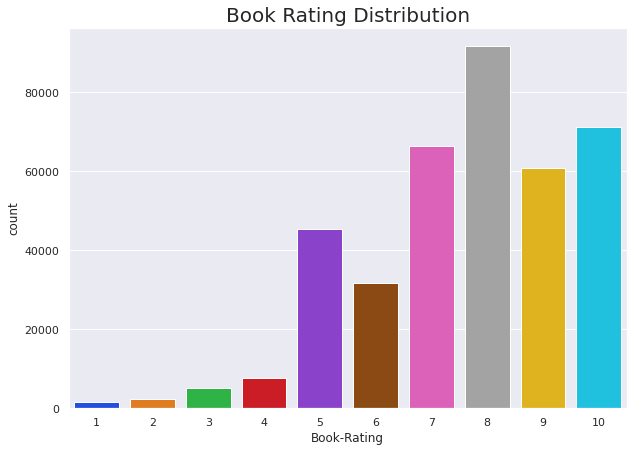

In [ ]:
#Plotting a countplot to visualize the rating pattern in our dataset
sns.countplot( x = "Book-Rating" , data = recSys_eda_df , palette = "bright") 
plt.title("Book Rating Distribution" , fontsize = 20)
plt.show()

Most of the users have given a rating of 8 to the books they read , while a surprisingly high number of books are also rated a perfect 10 by the users . Very few books have been rated below 5

##**Books Analysis**

### In this section we will try to find the most popular books , the most highly rated ones as well as the lowest rated ones to get to know the taste of the people and also what kind of books are receving more love or hate from them

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

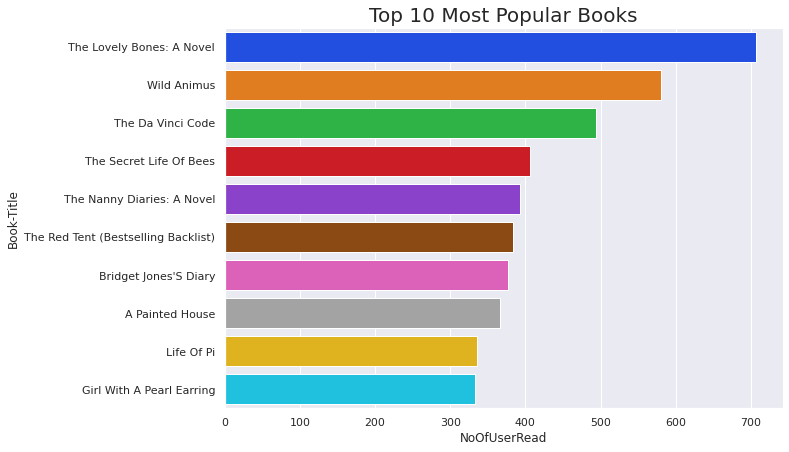

In [ ]:
#Getting the top 10 most read books by the user
top10PopularBooks = pd.DataFrame(recSys_eda_df["Book-Title"].value_counts()).reset_index().rename(columns = { "index" : "Book-Title" , "Book-Title" : "NoOfUserRead"}).head(10)

sns.barplot(y="Book-Title", x = "NoOfUserRead", data=top10PopularBooks, palette = "bright" ,orient = "h")
plt.title("Top 10 Most Popular Books" , fontsize = 20)
plt.show()

The Lovely Bones : A novel is the most popular book with more than 700 user ratings followed by Wild Animus with near about 600 user ratings . Also just going by the name we can confirm that we have 2 novels in top 5 so we can make the assumption that novels are most popular as compared to other kind of books as per the data in our dataset

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

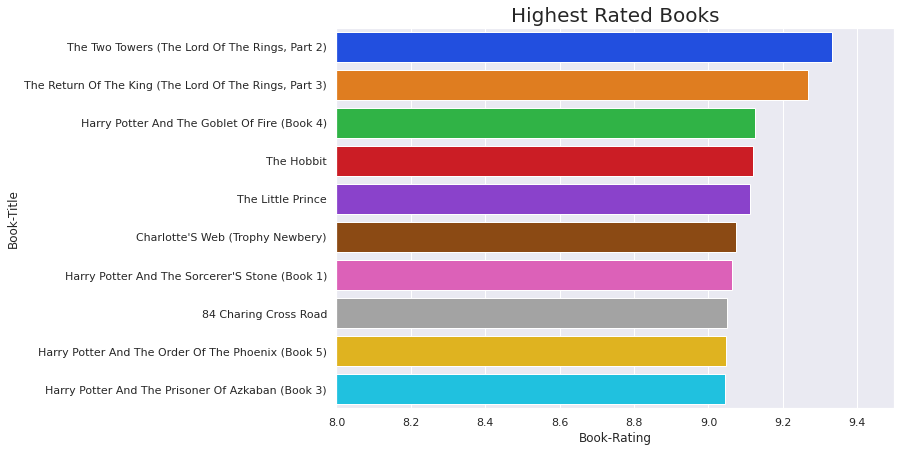

In [ ]:
#Getting the top 10 highest rated books in our dataset
HighestRatedBooks = recSys_eda_df.groupby("Book-Title").agg({ "User-ID" : "count" , "Book-Rating" : np.mean }).reset_index().rename(columns = { "User-ID" : "UsersRead"})
top10Ratedbooks = HighestRatedBooks[HighestRatedBooks["UsersRead"] >= 50].sort_values(by = "Book-Rating" , ascending = False).head(10)

ax = sns.barplot(y="Book-Title", x = "Book-Rating", data = top10Ratedbooks, palette = "bright" ,orient = "h")
ax.set(xlim=(8, 9.5))
plt.title("Highest Rated Books", fontsize = 20)
plt.show()

Looking at the Bar chart we can conclude that Lord Of The Rings Series and Harry Potter Serires are extremely loved by the users as the two of them account for 7 places out of this top 10 list of highest rated books .

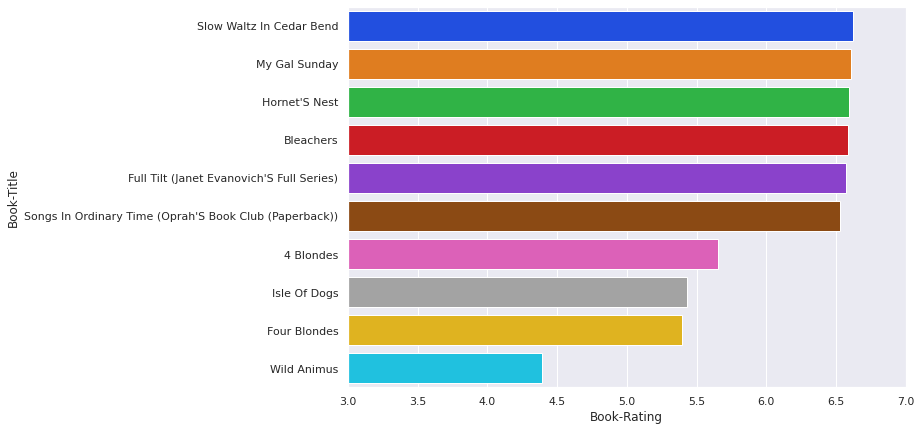

In [ ]:
#Getting the top 10 lowest rated books in our dataset
top10LowestRated = HighestRatedBooks[HighestRatedBooks["UsersRead"] >= 50].sort_values(by = "Book-Rating" , ascending = False).tail(10)
ax = sns.barplot(y="Book-Title", x = "Book-Rating", data = top10LowestRated, palette = "bright" ,orient = "h")
ax.set(xlim=(3, 7))
plt.show()

One interesting thing to notice here is Wild Animus which is one of the most popular books in our dataset is also the lowest rated 

## **Author Analysis**

### In this section our goal is to find the most popular author in terms of number of books read by the people that are written by them , also we will try to find the authors who have published the most number of books and last but not the least the top 10 most loved authors

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

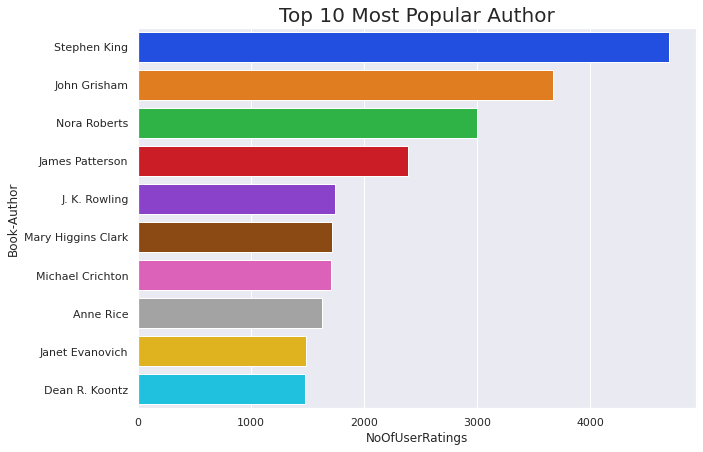

In [ ]:
#Getting the top 10 most popular author 
top10PopularAuthors = pd.DataFrame(recSys_eda_df["Book-Author"].value_counts()).reset_index().rename(columns = { "index" : "Book-Author" , "Book-Author" : "NoOfUserRatings"}).head(10)

sns.barplot(y="Book-Author", x = "NoOfUserRatings", data=top10PopularAuthors, palette = "bright" ,orient = "h")
plt.title("Top 10 Most Popular Author", fontsize = 20)
plt.show()

As we can see Stephen king is the king here , the combined sum of no. of reviews of his different books is more than 4000 , John Grisham and Nora roberts are on 2nd and 3rd place with around 3700 and 3000 user rating records respectively . JK Rowling who is well known for his Harry Potter series is in the list as well at 5th place.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

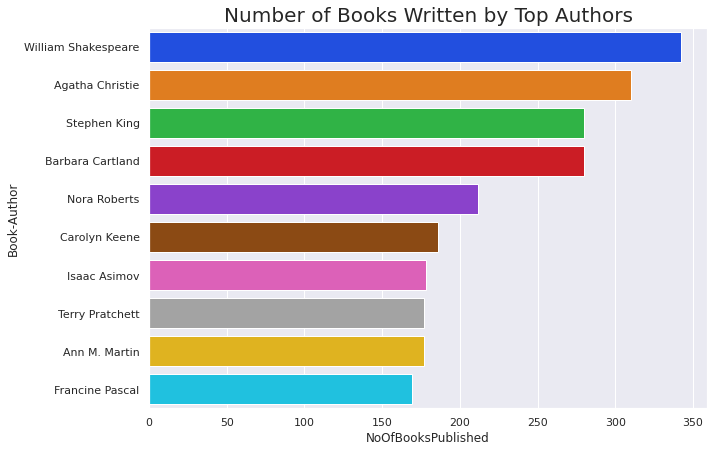

In [ ]:
#Using Groupby to get the total number of books each author has written 
AuthorBookFreq = recSys_eda_df.groupby(["Book-Author"]).agg({ "Book-Title" : pd.Series.nunique}).reset_index().sort_values(by = "Book-Title" , ascending = False)
top10AuthorBookFreq = AuthorBookFreq.rename(columns = { "Book-Title" : "NoOfBooksPublished"}).head(10)

sns.barplot(y="Book-Author", x = "NoOfBooksPublished", data = top10AuthorBookFreq, palette = "bright" ,orient = "h")
plt.title("Number of Books Written by Top Authors" , fontsize = 20)
plt.show()

Sir William Shakespeare is on the top of this list , he is the author of more than 330 books in our dataset , Agatha Christie and Stephen king are on 2nd and 3rd place respectively each accredited with the title of Book author for more than 250 books . And taking in account the previous bar graph we can conclude that even though William Shakespeare has writeen more number of books it is stephen king which is more popular 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

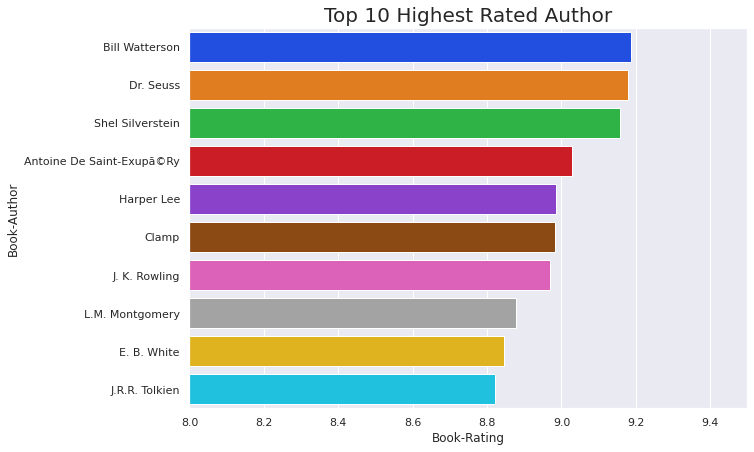

In [ ]:
#Getting the top 10 author in terms of highest average rating of their books
HighestRatedAuthor = recSys_eda_df.groupby("Book-Author").agg({ "User-ID" : "count" , "Book-Rating" : np.mean }).reset_index().rename(columns = { "User-ID" : "UsersRead"})
top10RatedAuthor = HighestRatedAuthor[HighestRatedAuthor["UsersRead"] >= 100].sort_values(by = "Book-Rating" , ascending = False).head(10)

ax = sns.barplot(y="Book-Author", x = "Book-Rating", data = top10RatedAuthor, palette = "bright" ,orient = "h")
ax.set(xlim=(8, 9.5))
plt.title("Top 10 Highest Rated Author", fontsize = 20)
plt.show()


Maud Hart Lovelace and Art Speigelman are the two most loved authors as all of their books have an average rating of 9.2 , we can also notice J K Rowling in the bar graph which makes sense as his Harry Potter Book Series is among the Highest Rated books in our dataset

## **Book Publisher Analysis**

### Next up is Publisher , for this our objective is to at first find those publishers whose books are most popular and then secondly to find the ones whose books are most highly rated by the users

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

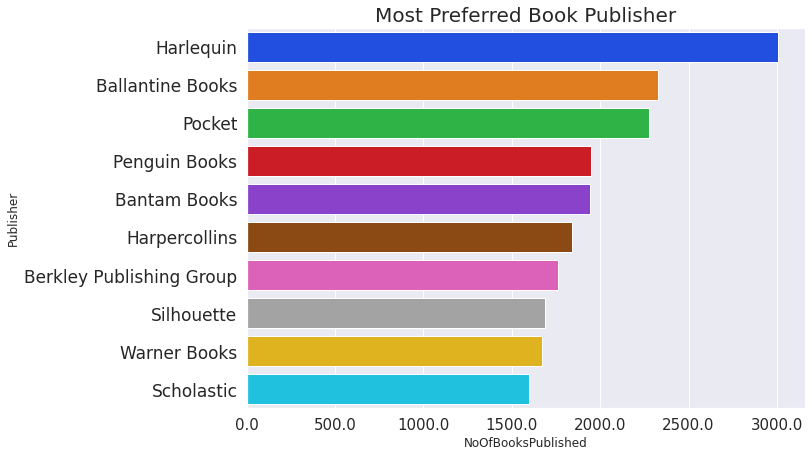

In [ ]:
#Getting the total number of books published by each publishing house in our dataset
topBookPublisher = recSys_eda_df.groupby("Publisher").agg({ "ISBN" : pd.Series.nunique}).reset_index()
top10BooksPublisher = topBookPublisher.rename(columns = { "ISBN" : "NoOfBooksPublished" }).sort_values(by = "NoOfBooksPublished" , ascending = False).head(10)

p = sns.barplot( x = "NoOfBooksPublished" , y = "Publisher" , data = top10BooksPublisher , palette = "bright" , orient = "h")
plt.title("Most Preferred Book Publisher", fontsize = 20)
_, ylabels = plt.yticks()
p.set_yticklabels(ylabels, size=17)
p.set_xticklabels(p.get_xticks(), size=15)
plt.savefig("preferredpublisher.png" , bbox_inches = "tight")
files.download("preferredpublisher.png")
plt.show()

Harlequin publishing house is the publisher of most number of books in our dataset , they are the publisher of around 3000 books . Ballantine books and Pocket books both are publisher of almost 2200 books each 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

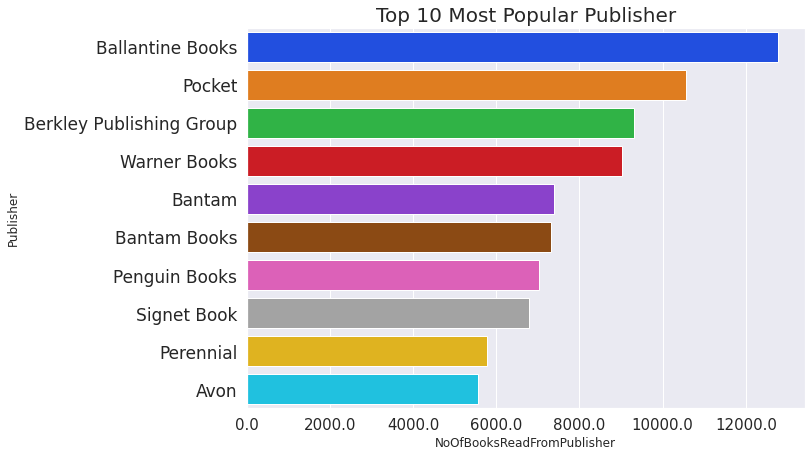

In [ ]:
#Getting the top 10 most popular publishing house in terms of no. of user reads
topBookPublisherRead = recSys_eda_df.groupby("Publisher").agg({ "ISBN" : "count"}).reset_index()
top10BooksPublisherRead = topBookPublisherRead.rename(columns = { "ISBN" : "NoOfBooksReadFromPublisher" }).sort_values(by = "NoOfBooksReadFromPublisher" , ascending = False).head(10)

p = sns.barplot( x = "NoOfBooksReadFromPublisher" , y = "Publisher" , data = top10BooksPublisherRead , palette = "bright" , orient = "h" ,label='big')
plt.title("Top 10 Most Popular Publisher" , fontsize = 20)
plt.savefig("popularPublisher.png" , bbox_inches = "tight")
files.download("popularPublisher.png")
plt.show()

Books from Ballantine books publishing house are the most popular , if we sum the total number of reviews books published by them have received then the count comes to around 12500 which is really huge . On the second and third place in this list are Pocket Publishing house and Berkley Publishing Group respectively .

## **Age Group Analysis**

### Our Dataset contains Book Rating from people of all age groups starting from 10 year old kids and then going as high as 100 year old seniors . In this section after plotting an age distribution pie chart we will try to decode the reading and rating pattern across people from different age groups. 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

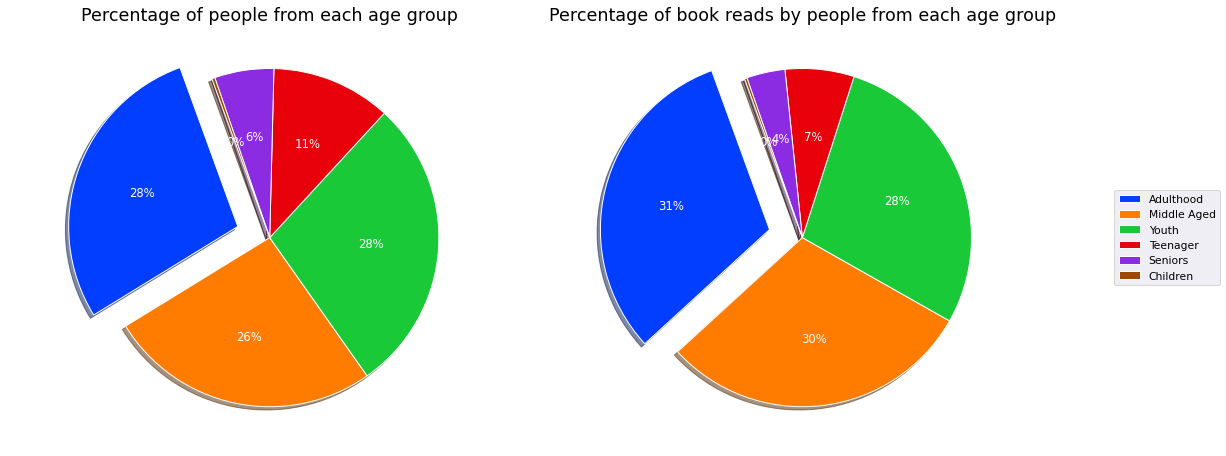

In [ ]:
#Finding the number of rating records we have from people belonging to each Age group in our dataset
EachAgeGroupRatingCount = recSys_eda_df["Age-Group"].value_counts()
#Finding the number of people we have from Each Age group in our dataset
EachAgeGroupFreq = recSys_eda_df.groupby("Age-Group").agg({ "User-ID" : pd.Series.nunique }).reindex(EachAgeGroupRatingCount.index)

#Making a list of different Age groups
EachAgeGroup = list(EachAgeGroupRatingCount.index)
#Making a list of total users count from each Age group
EachAgeGroupFreq_Count = list(EachAgeGroupFreq["User-ID"].values)

#Making a list of total rating records from users of each Age Group
EachAgeGroupRatedBookCount = list(EachAgeGroupRatingCount.values)

''' Plotting a two different Pie Charts
    1st one will show the number of users we have from each age group in our dataset in terms of percentage
    2nd one will show the total count of rating records we have from people of each age group in our dataset
'''

fig, axes = plt.subplots( figsize=(18,8) ,dpi=70,nrows=1, ncols=2)
totalStoreTypes = len(EachAgeGroup)

#fig = plt.figure()
#axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])
plt.rcParams['text.color'] = 'black'
colors = sns.color_palette('bright')[0:totalStoreTypes]

explode = [0]*totalStoreTypes
explode[0] = 0.2

wedges, texts, autotexts = axes[0].pie(EachAgeGroupFreq_Count, explode=explode, labels = EachAgeGroup, colors=colors, 
                                    autopct='%1.0f%%', shadow=True, startangle=110, 
                                    textprops=dict(color="w"))

wedges, texts, autotexts = axes[1].pie(EachAgeGroupRatedBookCount, explode=explode, labels = EachAgeGroup, colors=colors, 
                                    autopct='%1.0f%%', shadow=True, startangle=110, 
                                    textprops=dict(color="w"))

plt.legend(wedges, EachAgeGroup, loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
axes[0].set_title("Percentage of people from each age group" , fontsize = 18)
axes[1].set_title("Percentage of book reads by people from each age group" , fontsize = 18)

In the first pie plot we can notice that more than 80 percent of the users in our dataset either belong to Youth , Adulthood or Middle Ages , so in layman terms the majority of the users belong to 21-60 age brackets

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

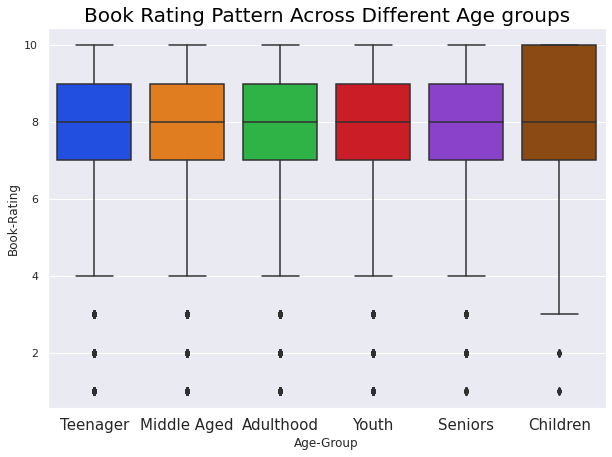

In [ ]:
#Plotting a boxplot to understand the rating pattern of people from each Age group
p = sns.boxplot( x = "Age-Group" , y = "Book-Rating" , data = recSys_eda_df , palette = "bright")
plt.title("Book Rating Pattern Across Different Age groups" , fontsize = 20)
_, xlabels = plt.xticks()
p.set_xticklabels(xlabels, size=15)

The rating patter is more or less similar across people of all age groups , one thing we can notice is that childrens are more sentimental while rating the books as compared to people of higher age 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

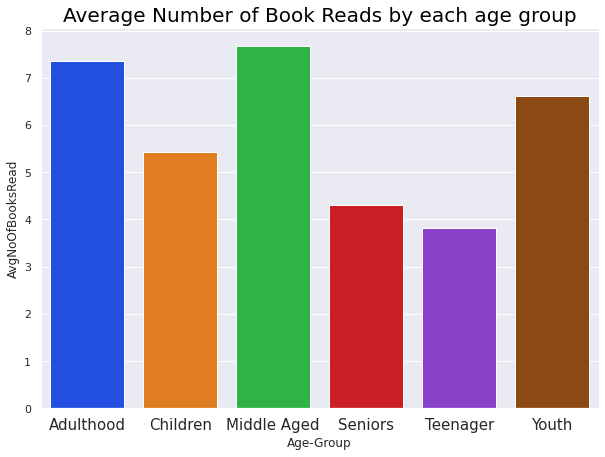

In [ ]:
#No of books read and rated on Average by individuals belonging from each Age groups
ageGroupBooksRead = recSys_eda_df.groupby("Age-Group").agg({ "ISBN" : "count" , "User-ID" : pd.Series.nunique }).reset_index()
ageGroupBooksRead["AvgNoOfBooksRead"] = ageGroupBooksRead["ISBN"]/ageGroupBooksRead["User-ID"]

p = sns.barplot(y="AvgNoOfBooksRead", x = "Age-Group", data = ageGroupBooksRead, palette = "bright" )
plt.title("Average Number of Book Reads by each age group", fontsize = 20)

If we just sum up all the book reviews by people from each age group and take average then according to the info in our dataset we can say that a Middle Aged person will read and review almost 7-8 books on average which is highest across all other Age groups . On the second placed are people who people who belong to Adulthood age group , all in all the general conclusion is book reading is more popular in people from 30-60 age group

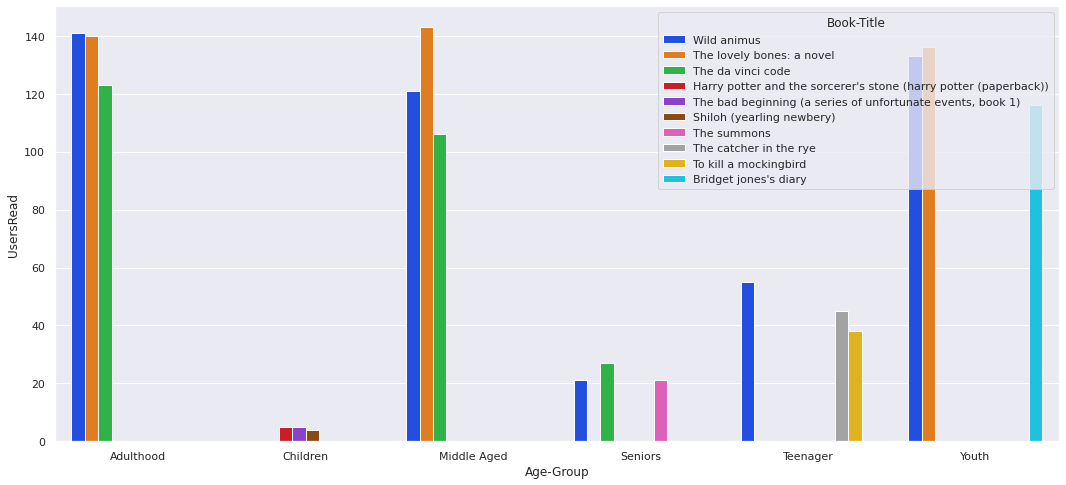

In [ ]:
k = recSys_eda_df.groupby(["Age-Group" , "Book-Title"]).agg({ "User-ID" : "count"}).reset_index().rename( columns = { "User-ID" : "UsersRead"})
huePlot = k.set_index("Book-Title").groupby(["Age-Group"])['UsersRead'].nlargest(3).reset_index()
huePlot

g = sns.barplot(x="Age-Group" , y="UsersRead" , hue = "Book-Title" , data = huePlot , palette = "bright" )
plt.gcf().set_size_inches(18, 8)

Here we have somewhat tried to plot top 3 most popular books from each age group . 

## **Decade Analysis**

### This is the section where we will try to understand the relation between  Year of Publication of the books and the popularity of the books

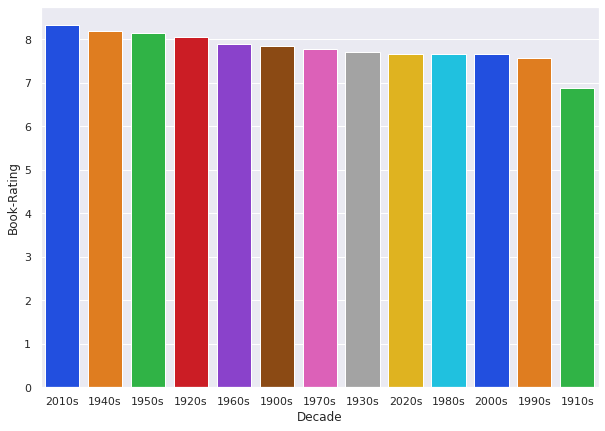

In [ ]:
#Finding the Decade in which the books published received the highest average rating
YearOfPublishedAvgRating = recSys_eda_df.groupby("Decade").agg({ "Book-Rating" : np.mean }).reset_index().sort_values(by = "Book-Rating" , ascending = False)

sns.barplot(y = "Book-Rating" , x = "Decade" , data = YearOfPublishedAvgRating , palette = "bright" )

Books published in 2010s have been rated generally higher as compared to all other decades . 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

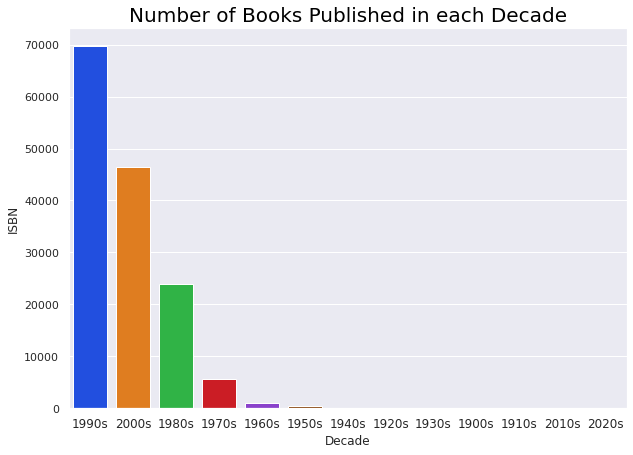

In [ ]:
#Finding the number of books published in each decade as per our dataset
YearOfPublishedAvgBooks = recSys_eda_df.groupby("Decade").agg({ "ISBN" : pd.Series.nunique }).reset_index().sort_values(by = "ISBN" , ascending = False)

p = sns.barplot(y = "ISBN" , x = "Decade" , data = YearOfPublishedAvgBooks , palette = "bright" )
plt.title("Number of Books Published in each Decade" , fontsize = 20)
_, xlabels = plt.xticks()
p.set_xticklabels(xlabels, size=12)
plt.savefig("decade.png" , bbox_inches = "tight")
files.download("decade.png")
plt.show()

Looking at this bar graph we can conclude that majority of the books in our dataset were published between the period of 1980-2009 with 1990s being on top. Around 70 thousand books in our dataset were published sometime in the 90's

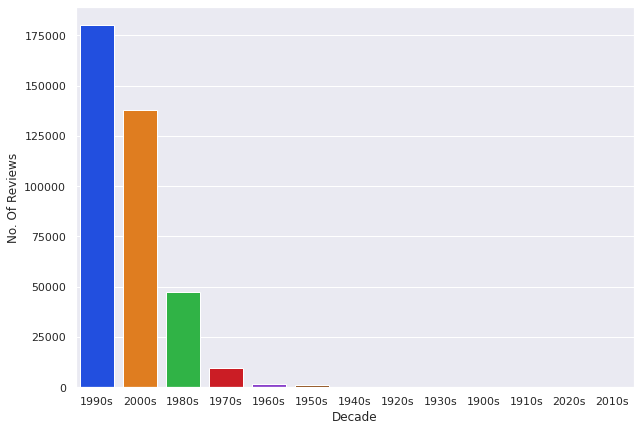

In [ ]:
YearOfPublishedMostReviews = recSys_eda_df["Decade"].value_counts().reset_index().rename( columns = { "index" : "Decade" , "Decade" : "No. Of Reviews"})
sns.barplot(y = "No. Of Reviews" , x = "Decade" , data = YearOfPublishedMostReviews , palette = "bright")

## **Location Analysis**

### Along with user age we also have location of the users as well in our dataset , so we will now try to exploit that information in order to gain some useful insights

In [ ]:
#Getting the list of Top 10 City in terms of number of rating records from that area
pd.DataFrame(recSys_eda_df["City"].value_counts()).head(10)

,City
toronto,6050
morrow,5696
london,3992
chicago,3300
seattle,3063
new york,3040
portland,2999
ottawa,2988
honolulu,2705
san diego,2371


Toronto , Morrow and London are the top 3 city in terms of number of reviews present in our dataset from users who belong to one of these 3 cities

In [ ]:
#Getting the list of Top 10 state in terms of number of rating records present in our dataset from that area 
pd.DataFrame(recSys_eda_df["State"].value_counts()).reset_index().head(10)

,index,State
0,california,35708
1,ontario,16164
2,texas,15322
3,georgia,13085
4,new york,13053
5,florida,11106
6,illinois,10419
7,washington,10083
8,pennsylvania,9907
9,england,9175


California , Ontario and Texas are the top 3 states in terms of number of number of reviews present in our dataset from users who belong to one of these 3 States

In [ ]:
#Getting the list of top 10 Country in terms of number of rating records present in our dataset from that area
country_groupby = recSys_eda_df.groupby("Country").agg({ "Book-Rating" : np.mean , "ISBN" : "count"}).reset_index()
topCountry = country_groupby.sort_values(by = "ISBN" , ascending = False).head(10)

#Sorting the Top 10 Country in terms of number of rating records by average book rating given by users from that country
topCountryAvgRating = topCountry.sort_values(by = "Book-Rating" , ascending = False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

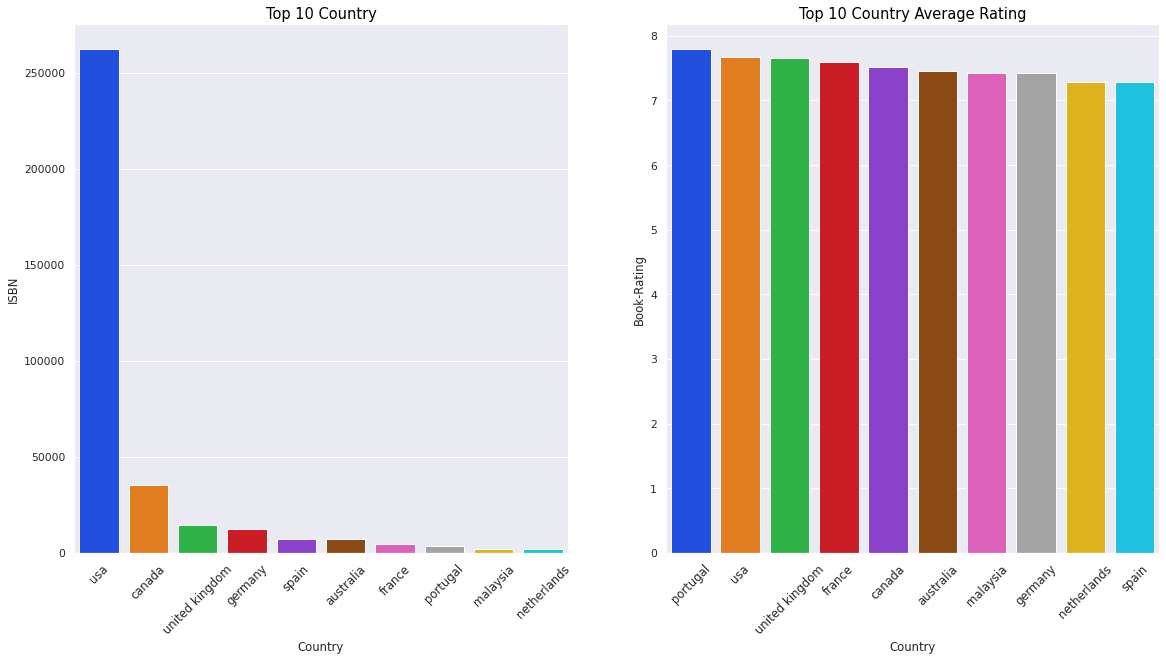

In [ ]:
fig, axes = plt.subplots( figsize=(20 ,10) ,dpi=70,nrows=1, ncols=2)
p = sns.barplot( y = "ISBN" , x = "Country" , data = topCountry , palette = "bright" , ax = axes[0])
s = sns.barplot( y = "Book-Rating" , x = "Country" , data = topCountryAvgRating , palette = "bright" , ax = axes[1])
axes[0].tick_params(axis='x', rotation=45 , labelsize=12)
axes[0].set_title("Top 10 Country", fontsize = 15)

axes[1].tick_params(axis='x', rotation=45,  labelsize=12)
axes[1].set_title("Top 10 Country Average Rating", fontsize = 15)


plt.savefig("Country.png", bbox_inches = "tight")
files.download("Country.png")

Here the first Bar plot is showing the top 10 Country in terms of number of rating records from that area and as we can see most of the records in our dataset are from United States of America and Canada

In the second Barplot we have the average rating given by users from that country to different books in a sorted manner and even though the difference is not much we can notice that people from portugal are more lenient while rating books whereas people from Spain are a bit more harsh

In [ ]:
#Getting the list of most Popular Authors in usa
pd.DataFrame(recSys_eda_df[recSys_eda_df["Country"] == "usa"]["Book-Author"].value_counts()).head(10)

,Book-Author
Stephen king,3373
John grisham,2738
Nora roberts,2476
James patterson,1920
J. k. rowling,1346
Mary higgins clark,1271
Michael crichton,1253
Dean r. koontz,1224
Janet evanovich,1214
Anne rice,1209


People from Usa mostly prefers to read books written by Stephen King

In [ ]:
#Getting the list of Most popular books in Usa
pd.DataFrame(recSys_eda_df[recSys_eda_df["Country"] == "usa"]["Book-Title"].value_counts()).head(10)

,Book-Title
The lovely bones: a novel,531
The da vinci code,396
The secret life of bees,361
The nanny diaries: a novel,321
A painted house,310
The red tent (bestselling backlist),300
Wild animus,298
Harry potter and the chamber of secrets (book 2),273
Harry potter and the sorcerer's stone (harry potter (paperback)),270
Divine secrets of the ya-ya sisterhood: a novel,269


# **Building Different Recommender System**

First of all we will install surprise which is a python scikit for recommender System , we will use surprise for splitting our dataset into train and test set so that we can evaluate the different recommender systems that we are going to build later on using the test set.

In [ ]:
#Installing surprise 
!pip install surprise

In [ ]:
#Importing all the necessary method we will use and need from scikit

from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import LeaveOneOut

from collections import defaultdict
import numpy as np

## **Popular Books Recommender**

### Our First Recommender System is kinda simpler one , this recommender system will only recommend the most popular books a certain user hasn't read yet. Though this recommender system doesn't scores well on novelty and diversity factor but it doesn't suffer from cold start problem and so comes in very handy while recommending items to new users

In [87]:
def getPopularityRanks( df , userId , topn = 10):

  '''Function to get the records for the Top n most popular books'''

  read_books_title = list(df[df["User-ID"] == userId ]["Book-Title"].values)
  reader_country = df[df["User-ID"] == 170513]["Country"].value_counts().index[0]
  df_unread = df[(~df["Book-Title"].isin(read_books_title)) & (df["Country"] == reader_country)]
  df_recommendation = df_unread.groupby(["Book-Title"]).agg({ "User-ID" : "count" , "Book-Rating" : "mean"}).reset_index().sort_values(by = "User-ID" , ascending = False)
  return df_recommendation.reset_index().head(topn)

In [90]:
#Picking a random User-ID 
user_id = np.random.choice(recSys_df["User-ID"].values)
print(f"------ Top 10 Popular Recommendation for user id : {user_id} are ------")

#Calling getPopularityRanks function to get the top 10 recommendations in terms of popularity for the picked User id 
getPopularityRanks( recSys_df , user_id , 10 )

------ Top 10 Popular Recommendation for user id : 123544 are ------


,index,Book-Title,User-ID,Book-Rating
0,2132,The Lovely Bones: A Novel,145,8.296552
1,1914,The Da Vinci Code,118,8.728814
2,2289,The Secret Life Of Bees,115,8.660870
3,848,Harry Potter And The Chamber Of Secrets (Book 2),102,8.901961
4,852,Harry Potter And The Prisoner Of Azkaban (Book 3),96,9.229167
5,347,Bridget Jones'S Diary,90,7.377778
6,71,A Painted House,86,7.883721
7,854,Harry Potter And The Sorcerer'S Stone (Harry P...,85,9.047059
8,850,Harry Potter And The Goblet Of Fire (Book 4),83,9.397590
9,2253,The Red Tent (Bestselling Backlist),83,8.566265


These are the top 10 recommendations generated using popularity based recommendation method for user id 35859

## **Author Preference Based Recommendation**

### Our second recommender system is Author Preference Based Recommendation , this recommender system is built around the idea that if a user reads and likes a book from a certain author, then it is wise to recommend other highly rated books from that same author. 

In [ ]:
def get_authors(userId , df):

  '''Function to get the list of authors whose books a certain user has already read in the past'''

  author_set = list(df[df["User-ID"] == userId]["Book-Author"])
  #refined_author_set = set([ (x.lower()).capitalize() for x in author_set])
  return author_set

In [ ]:
def getPopularityRanks(df, userId ,  topn = 10):

  '''Function to get the records for the Top n most popular books'''

  read_books_title = list(df[df["User-ID"] == userId ]["Book-Title"].values)
  df_unread = df[~df["Book-Title"].isin(read_books_title)]
  df_recommendation = df_unread.groupby(["Book-Title"]).agg({ "User-ID" : "count" , "Book-Rating" : "mean" ,"Author_Fact" : "first"}).reset_index()
  df_recommendation["RankerCount"] = df_recommendation["User-ID"]*df_recommendation["Author_Fact"]
  return df_recommendation[df_recommendation["Book-Rating"] >= 8.0][["Book-Title" , "Book-Rating" , "RankerCount"]].sort_values(by = "RankerCount" , ascending = False).head(topn)

In [ ]:
def author_multiplier(author_name , auth_dict):

  '''Function to calculate the author multiplier value '''

  freq = auth_dict[author_name]
  if freq == 1:
    return freq
  else:
    return 1 + (freq - 1)*0.25

In [ ]:
#Randomly selecting a user id
user_id = np.random.choice(recSys_df["User-ID"].values)

#Calling the get_authors function passing the randomly selected user id
authors_list = get_authors(user_id , recSys_df)

#Creating an empty dictionary
authors_dict = {}

#Using a for loop to generate a dictionary containing the name of the author and the number of times his/her book have been read by the user
for author in authors_list:
  authors_dict[author] = authors_list.count(author)

In [ ]:
#Filtering the dataframe so that it only contains books of those authors whose work they have already read and rated atleast once in the past
filtered_df = recSys_df[recSys_df["Book-Author"].isin(authors_list)].copy()
filtered_df["Author_Fact"] = filtered_df["Book-Author"].apply(author_multiplier, args = (authors_dict ,))

print(f"-Top 10 Popular Author Based Recommendation for user id: {user_id} are-")
getPopularityRanks(filtered_df , user_id , 10 )

-Top 10 Popular Author Based Recommendation for user id: 124876 are-


,Book-Title,Book-Rating,RankerCount
35,Harry Potter And The Order Of The Phoenix (Boo...,9.000000,164.50
36,Harry Potter And The Sorcerer'S Stone (Harry P...,9.043011,162.75
44,Misery,8.200000,120.00
102,The Talisman,8.442308,104.00
39,Insomnia,8.274510,102.00
40,It,8.162791,86.00
73,The Green Mile,8.609756,82.00
52,Nightmares &Amp; Dreamscapes,8.024390,82.00
60,Skeleton Crew,8.282051,78.00
70,"The Drawing Of The Three (The Dark Tower, Book 2)",8.256410,78.00


## **Train And Test Data Preparation**

###Now to evaluate our recommender systems we have to divide our dataset into training and test sets and to do this we will take the help of suprise library

In [ ]:
#Initializing the reader method
reader = Reader()

#Loading our pandas dataframe into a surprise dataset
recSys_surprise_df = Dataset.load_from_df(recSys_df[["User-ID" , "ISBN" , "Book-Rating"]], reader=reader)

In [ ]:
#Initializing the leave one out evluation method
LOOCV = LeaveOneOut(n_splits=1, random_state=1)

In [ ]:
def splitter():

  '''Function to split our dataset into training and test set on the basis of leave one out principle'''

  for trainSet, testSet in LOOCV.split(recSys_surprise_df):
    return trainSet, testSet

In [ ]:
#Calling the splitter function to get out training and test set
trainSet, testSet = splitter()

In [ ]:
def invert_dictionary(dictionary):
    """
    Function to invert a dictionary
    Args: 
        dictionary (dict): A dictionary
    Returns:
        dict: inverted dictionary
    """
    return {v: k for k, v in dictionary.items()}

In [ ]:
def surprise_trainset_to_df(trainset, col_user="User-ID", col_item="ISBN", col_rating="Book-Rating"): 

    ''' Function to convert a surprise dataset into a pandas dataframe'''

    df = pd.DataFrame(trainset.all_ratings(), columns=[col_user, col_item, col_rating])
    map_user = trainset._inner2raw_id_users if trainset._inner2raw_id_users is not None else invert_dictionary(trainset._raw2inner_id_users)
    map_item = trainset._inner2raw_id_items if trainset._inner2raw_id_items is not None else invert_dictionary(trainset._raw2inner_id_items)
    df[col_user] = df[col_user].map(map_user)
    df[col_item] = df[col_item].map(map_item)
    return df

In [ ]:
#Calling the surprise_trainset_to_df function to change the suprise trainset into a pandas dataframe
trainSet_df = surprise_trainset_to_df(trainSet)

In [ ]:
#Importing all the tools we will need to get the user item rating matrix 
from scipy.sparse import csr_matrix, lil_matrix
from scipy.sparse.linalg import svds
from tqdm import tqdm
tqdm.pandas()

In [ ]:
#Creating a list of all unique user id in our training set
users = trainSet_df['User-ID'].unique()

#Creating a list of all different books in our training set
books = trainSet_df['ISBN'].unique()

In [ ]:
#Masking the ISBN and User-ID value with simpler number starting from zero 
trainSet_df['books'] = trainSet_df['ISBN'].progress_apply(lambda x : np.argwhere(books == x)[0][0])
trainSet_df['users'] = trainSet_df['User-ID'].apply(lambda x : np.argwhere(users == x)[0][0])

100%|██████████| 39736/39736 [00:18<00:00, 2189.65it/s]


In [ ]:
#Creating a sparse user-item matrix
occurences = lil_matrix((users.shape[0], books.shape[0]), dtype='int8')

def set_occurences(visitor, item , rating):
    occurences[visitor, item] = rating

trainSet_df.apply(lambda row: set_occurences(row['users'], row['books'] , row["Book-Rating"]), axis=1)

occurences

<1266x3133 sparse matrix of type '<class 'numpy.int8'>'
	with 39736 stored elements in List of Lists format>

In [ ]:
#Creating a new dataset using trainset_df with index set to User-ID values
trainSet_indexed_df = trainSet_df.set_index("User-ID")

## **Knn Recommender System**

###This recommender system is based on collaborative filtering technique implemented using nearest neighbour algorithm . Here at first we will try to find out  k most similar users/neighbour based on the reading pattern of the user we are trying to generate recommendations for and we will generate recommendations for this user consisting of books that his k neighbours have already read and liked in the past. 

In [ ]:
#Importing the sklearn library and other important methods
import sklearn
from collections import defaultdict
from operator import itemgetter

In [ ]:
#Changing our user-item matrix to array
R = occurences.toarray()

#Creating a list of all unique user id in our training set
user_ids = list(trainSet_df["User-ID"].unique())
#Creating a list of all unique ISBN number in our training set
book_isbn = list(trainSet_df["ISBN"].unique())

#Creating a copy of our dataframe
knn_df = ratings_from_selected_users_df.copy()
#Creating a new dataset from knn_df with index set to User-ID values
knn_indexed_df = knn_df.set_index('User-ID')

In [ ]:
#Creating a new dataframe where rows representd the users and columns represents the different book ISBN numbers
knn_preds_df = pd.DataFrame(R, columns = book_isbn , index = user_ids)
#Checking the head of the dataframe
knn_preds_df.head()

,0671021001,0618002219,0142001740,0399146431,0060934700,0066238501,0380789035,0380973650,0439064864,0439136350,...,0804108447,0812522397,0060508302,8477204055,0446671002,0375414657,0140620338,2253150711,3426600218,0399144315
254,7,9,9,9,9,5,10,9,9,9,...,0,0,0,0,0,0,0,0,0,0
638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Importing NearestNeighbors from sklearn library
from sklearn.neighbors import NearestNeighbors

#Initializing the Nearest Neighbors model with cosine metric and brute algorithm
model_knn=NearestNeighbors(metric = "cosine" , algorithm="brute")
#Fitting our data on the model
model_knn.fit(occurences)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
#Creating a lookup_df by resetting the index of our knn_preds_df
lookup_df = knn_preds_df.reset_index()

#Selecting a random index number
user_index_number = 112

#Calling kneighbors on our model to get the distance and indices/position of the top 10 nearest neighbors in this case
distances, indices = model_knn.kneighbors(lookup_df.iloc[user_index_number, 1:].values.reshape(1,-1), n_neighbors = 10)

#Creating an empty dictionary
candidates = defaultdict(float)

'''Using a for loop we run through all the nearest neighbors one at a time creating a dictionary
   containing the book ISBN numbers and a rating score associated with it which is calculated using the book rating given
   by a specific neighbour to that book and its similarity score'''

for index ,similarUser in enumerate(indices.flatten()):
  userId = knn_preds_df.index[similarUser]
  userSimilarityScore = 1 - distances.flatten()[index]
  theirRatings = list(zip(knn_indexed_df.loc[userId]["ISBN" ] , knn_indexed_df.loc[userId]["Book-Rating" ]))
  for rating in theirRatings:
    candidates[rating[0]] += ((rating[1] / 10.0) * userSimilarityScore)

#Getting the actual user id by passing the index position value
primary_userId = knn_preds_df.index[user_index_number]
#Creating a set of all the boooks the user has already read
watched_list = set(trainSet_indexed_df.loc[primary_userId]["ISBN" ])

pos = 0
print(f'--- Top 10 recommendations for users id {primary_userId} are ---')
#Using a for loop to run through the dictionary in sorted order of rating and printing the recommendations.
for itemID, ratingSum in sorted(candidates.items(), key=itemgetter(1), reverse=True):
  if not itemID in watched_list:
    book_title = set(knn_indexed_df[knn_indexed_df["ISBN"] == itemID]["Book-Title"])
    print(f'{pos+1}: {next(iter(book_title))} : {round(ratingSum,4)}')
    pos += 1
    if (pos >= 10):
      break

--- Top 10 recommendations for users id 30035 are ---
1: High Five (A Stephanie Plum Novel) : 0.9571
2: Two For The Dough : 0.6844
3: Four To Score (A Stephanie Plum Novel) : 0.5935
4: Angus, Thongs And Full-Frontal Snogging: Confessions Of Georgia Nicolson : 0.5
5: Seven Up (A Stephanie Plum Novel) : 0.4963
6: Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel) : 0.4625
7: My Antonia : 0.4507
8: Skipping Christmas : 0.3442
9: The Survivors Club : 0.3141
10: The Five People You Meet In Heaven : 0.3012


Looking at the recommendations it seems that user id number 30035 really likes to read Stephanie plum novels 

In [ ]:
#Adding Book-Title column to trainSet df by merging it with recSys_df using inner join
trainSet_full_df = pd.merge(trainSet_df , recSys_df[["User-ID","ISBN" , "Book-Title"]] ,on = ["ISBN" , "User-ID"] )

#Creating a list of books that user id 300035 have already read
list(trainSet_full_df[trainSet_full_df["User-ID"] == primary_userId]["Book-Title"].values)

['One For The Money (Stephanie Plum Novels (Paperback))',
 'The Pelican Brief',
 'Isle Of Dogs',
 'Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel)',
 'Airframe',
 'A Place Called Freedom',
 'Cry Wolf',
 'The Associate',
 'Hot Six : A Stephanie Plum Novel (A Stephanie Plum Novel)',
 'Three To Get Deadly : A Stephanie Plum Novel (A Stephanie Plum Novel)',
 'Visions Of Sugar Plums: A Stephanie Plum Holiday Novel',
 'Wild Justice',
 'Bourne Identity',
 'Cause Of Death',
 "Mcnally'S Secret (Archy Mcnally Novels (Paperback))"]

And as we can see that user id 30035 does have a thing for Stephanie plum novels , so we can say that recommendations generated using nearest neighbour method were not bad.

## **Gradient Descent Approach**

### This is recommender system is based on a popular collaborative filtering technique called matrix factorization . In this we will first create a user item matrix in our case a user books matrix and then we will use gradient descent to get the optimal decomposition of our matrix into two new matrix of which one is User matrix and the other one is item matrix . And finally the missing entries in the user book rating matrix will be replaced by the dot product of the factor matrices.

In [ ]:
class MF():

    
    def __init__(self, R, K, alpha, beta, iterations):
        """
        Function to perform matrix factorization to predict empty
        entries in a matrix.
        
        Arguments
        - R (ndarray)   : user-item rating matrix
        - K (int)       : number of latent dimensions
        - alpha (float) : learning rate
        - beta (float)  : regularization parameter
        """
        
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    def train(self):
        # Initializing user and item latent feature matrices
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))
        
        # Initializing the biases
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])
        
        # Creating a list of training samples

        i,j = self.R.nonzero()
        values = self.R[self.R.nonzero()]
        self.samples = list(zip(i , j, values))
        
        # Performing stochastic gradient descent for number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 10 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))
        
        return training_process

    def mse(self):
        """
        A function to compute the total mean square error
        """
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    def sgd(self):
        """
        Performing stochastic graident descent
        """
        for i, j, r in self.samples:
            # Computing prediction and error
            prediction = self.get_rating(i, j)
            e = (r - prediction)
            
            # Updating biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])
            
            # Creating copy of row of P since we need to update it but use older values for update on Q
            P_i = self.P[i, :][:]
            
            # Updating user and item latent feature matrices
            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * P_i - self.beta * self.Q[j,:])

    def get_rating(self, i, j):
        """
        Getting the predicted rating of user i and item j
        """
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction
    
    def full_matrix(self):
        """
        Computing the full matrix using the resultant biases, P and Q
        """
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [ ]:
#Creating an array of user item matrix 
R = occurences.toarray()

#Creating a class of MF and passing the necessary arguments
mf = MF(R, K=20, alpha=0.0225, beta=0.00465, iterations=100)
#Calling train method on our mf class initialization
training_process = mf.train()
print()
print("P x Q:")
print(mf.full_matrix())

Iteration: 10 ; error = 186.1151
Iteration: 20 ; error = 79.7273
Iteration: 30 ; error = 44.7978
Iteration: 40 ; error = 29.9350
Iteration: 50 ; error = 22.1447
Iteration: 60 ; error = 17.4976
Iteration: 70 ; error = 14.4788
Iteration: 80 ; error = 12.4025
Iteration: 90 ; error = 10.9089
Iteration: 100 ; error = 9.8076

P x Q:
[[ 6.96240888  8.95678955  9.01828974 ...  7.86167013  7.75982034
   8.31028923]
 [11.26261632 11.04154615 10.98648644 ...  9.10811414  8.6126494
   9.38597277]
 [ 8.52843092  9.32555422 11.30212843 ...  8.14925179  7.70514832
   8.67425349]
 ...
 [10.04586738  8.15428     7.64518919 ...  7.19545231  7.17724115
   7.28038395]
 [ 5.32595467  8.27720049 10.77908391 ...  6.19888816  6.03483033
   7.13510829]
 [ 8.3937634   8.01211116  9.32142795 ...  7.73788848  7.55903112
   8.50420597]]


In [ ]:
#Creating a list of all unique user id in our training set
user_ids = list(trainSet_df["User-ID"].unique())
#Creating a list of all unique book isbn numbers in our training set
book_isbn = list(trainSet_df["ISBN"].unique())

In [ ]:
#Creating a new dataframe where rows represents the different book ISBN numbers and columns represents the user ids.
gd_preds_df = pd.DataFrame(mf.full_matrix(), columns = book_isbn , index = user_ids).transpose()
#Checking the head of the new dataframe
gd_preds_df.head()

,254,638,882,1131,1435,2033,2276,2766,2891,3363,...,276050,276165,276231,276641,276680,277427,277523,278026,278194,278633
0671021001,6.962409,11.262616,8.528431,7.606207,6.684877,8.106934,9.297270,6.207663,8.118512,8.734670,...,8.991452,10.506452,4.488761,8.769233,7.902574,9.717076,10.173294,10.045867,5.325955,8.393763
0618002219,8.956790,11.041546,9.325554,8.154346,7.969406,9.872644,10.597407,7.104885,9.065646,9.647315,...,7.738064,9.281439,6.553492,8.162691,9.453904,8.294605,11.209479,8.154280,8.277200,8.012111
0142001740,9.018290,10.986486,11.302128,8.367796,5.643275,9.142559,12.791022,8.299565,7.181775,10.447162,...,7.183601,9.711809,10.563618,9.300757,8.326812,11.221460,11.396427,7.645189,10.779084,9.321428
0399146431,8.944878,9.499599,9.346415,7.261457,7.141709,9.787298,9.829877,7.633421,7.364163,9.393165,...,8.132761,8.533361,8.104515,7.217863,7.597693,8.452654,9.973303,6.570625,6.472940,6.411022
0060934700,9.004681,8.967566,8.974568,7.235240,8.042933,8.432675,9.257874,8.032343,7.691713,10.029048,...,6.831058,9.281532,6.839951,7.403802,8.068696,9.332775,9.943109,7.998015,6.683446,8.344451


Using Gradient descent we generated a new item-user matrix dataframe where we have predicted rating values for each of the book and that too for each of the user

## **Singular Value Decomposition**

### This is also based on same matrix factorization technique , the only difference is here we will use SVD to get optimal decomposition of our matrix.

In [ ]:
#Converting the user item matrix to an array
matrix = occurences.toarray()

#We are normalizing our user item matrix array by each user mean
user_ratings_mean = np.mean(matrix, axis = 1)
R_demeaned = matrix - user_ratings_mean.reshape(-1, 1)

In [ ]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 20

#Performing matrix factorization of the user item matrix
U, sigma, Vt = svds(R_demeaned, k = NUMBER_OF_FACTORS_MF)

In [ ]:
#In order to use matrix multiplication to get predictions we are converting our sigma matrix into the form of a diagonal matrix .
sigma = np.diag(sigma)
sigma.shape

(20, 20)

In [ ]:
#Performing matrix multiplication
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [ ]:
#Creating a list of all unique user id in our training set
user_ids = list(trainSet_df["User-ID"].unique())
#Creating a list of all unique book isbn number in our training set
book_isbn = list(trainSet_df["ISBN"].unique())

In [ ]:
#Creating a new dataframe where rows represents the different book ISBN numbers and columns represents the user ids.
svd_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = book_isbn , index = user_ids).transpose()
#Checking the head of the new dataframe
svd_preds_df.head()

,254,638,882,1131,1435,2033,2276,2766,2891,3363,...,276050,276165,276231,276641,276680,277427,277523,278026,278194,278633
0671021001,0.558701,1.149810,0.343024,0.232904,0.260517,0.158927,0.120673,0.805532,0.306980,0.153773,...,0.732561,0.902522,0.210618,-0.030822,0.916958,0.300157,0.060358,0.041330,-0.003716,0.884850
0618002219,1.389536,0.122933,0.041861,0.041253,0.025837,1.608694,-0.044426,0.061917,0.073386,0.164490,...,0.219238,1.556640,0.053420,-0.003667,0.049540,0.023282,0.057391,-0.014859,-0.049101,0.080482
0142001740,0.902828,0.839901,1.332563,0.624433,0.429070,-0.211210,-0.039531,0.429361,1.304019,0.708745,...,0.862702,0.468985,0.535547,0.294134,1.098578,1.000439,-0.123167,-0.040782,0.098340,0.575661
0399146431,0.764368,0.044888,0.067518,0.107110,0.050033,0.820976,-0.091986,0.023631,0.018551,0.073721,...,0.139718,0.932050,0.097585,0.031043,0.096124,0.398017,0.039016,0.122111,0.002173,-0.048712
0060934700,0.251155,0.153873,0.014278,-0.078274,0.001156,0.216070,0.094327,0.212229,0.036439,0.005655,...,0.136863,0.147489,-0.053947,0.001201,0.099692,0.228602,-0.032607,0.008025,0.021852,0.048439


Using SVD we generated a new item-user matrix dataframe where we have predicted rating values for each of the book against each of the user

## **Evaluation Time**

###The best way to evaluate a recommender system is through online A/B testing in which real users selected at random see the new model, and their behavior is compared to users who saw the old model. However, we can perform some evaluation offline as well to get a general idea of how our recommender system is performing before testing it out online which is time consuming and expensive as well .

###To evaluate our recommender system we randomly picked one rated book for each user and tossed it into the test set whereas the train set contained all of the rest rating records for each of the user. Then we generated Top N unread recommendation for each of the user using the train set and checked if the one item kept in the test set for that user made it into the list or not . Following are the few metrics we used to evaluate each recommender system

1.   Hit Rate ➡ To measure a Hit Rate, we first generate top N recommendations for all the users in our test data set. If generated top N recommendations contain something that users rated — 1 hit . In our case if the generated top-n list contains the data left out from the training set then we consider that as a hit 
2.  Cumulative Hit Rate ➡ Similar to Hit Rate the only difference is that in cumulative hit rate we only calculate hit rate for those item that the user actually liked.
3.  Average Reciprocal Hit Rate ➡ It is a variation of Hit Rate where we sum up the reciprocal of the rank of each hit . It takes in account "where" in the top N list our hits appear 
4.  Ranking Hit Rate ➡ Hit Rate for each of the rating value
5.  Diversity ➡ To calculate Diveristy we calculate similarity between each pair of items present in the top n recommendations and then subtract it by 1 to get the idea of how different each of the item are from the rest of the items in our top n recommendations
6.  Novelty ➡ To calculate Novelty we take in account the popularity ranking of the books and then we go through each of the user's top N list to find the average of all the popularity rankings for the books predicted for that user



In [ ]:
class CFRecommender:

    '''
    Get Top N recommended items for a User
    Arguments
        - cf_predictions_df (pandas dataframe) : user-item pandas dataframe 
        - items_df (pandas dataframe) : books info dataframe
    '''
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
      
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'Book-Rating', 'index' : "ISBN"})

        # Recommend the highest predicted rating books that the user hasn't read yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('Book-Rating', ascending = False).head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'ISBN', 
                                                          right_on = 'ISBN')[['Book-Rating', 'ISBN' , "Book-Title" ]]


        return recommendations_df

In [ ]:
#Import all the necessary tools we will need to evaluate our recommender system
from scipy.spatial.distance import cosine
import itertools
from collections import defaultdict

In [ ]:
class RecommenderMetrics:
    '''
    Different methods to calculate different evaluation metrics for a Recommender System
    HR:   Hit Rate; how often we are able to recommend a left-out rating. Higher is better.
    cHR:  Cumulative Hit Rate; hit rate, confined to ratings above a certain threshold. Higher is better
    ARHR: Average Reciprocal Hit Rank - Hit rate that takes the ranking into account. Higher is better.

    Diversity: 1-S, where S is the average similarity score between every possible pair of recommendations for a given user. Higher means more diverse.
    Novelty:   Average popularity rank of recommended items. Higher means more novel.
    '''

    def GetTopNPredictions(cf_recommender_model, trainSet_indexed_df):
      topN = defaultdict(list)
      #For each user id in the trainSet
      for userId in set(trainSet_indexed_df.index.values):
        #Creating a list of books already read and rated by the user 
        read_books = list(set(trainSet_indexed_df.loc[userId]["ISBN" ]))
        recommendations_df = cf_recommender_model.recommend_items(userId , read_books, 10 , True)
        #Creating a dictionary containing the top 10 recommended books for each of the user in our trainSet
        topN[userId].append(list(zip(recommendations_df["ISBN" ] ,recommendations_df["Book-Title"] ,recommendations_df["Book-Rating" ])))
      
      return topN

    def HitRate(topNPredicted, leftOutPredictions):
        hits = 0
        total = 0

        # For each left-out rating
        for leftOut in leftOutPredictions:
            userID = leftOut[0]
            leftOutBookISBN = leftOut[1]
            # checking if the book is in the predicted top 10 for this user
            hit = False
            for BookISBN, BookTitle, predictedRating in topNPredicted[int(userID)][0]:
                if (leftOutBookISBN == BookISBN):
                    hit = True
                    break
            if (hit) :
                hits += 1

            total += 1

        # Computing overall hit rate
        return hits/total

    def CumulativeHitRate(topNPredicted, leftOutPredictions, ratingCutoff=7.0):
        hits = 0
        total = 0

        # For each left-out rating
        for userID, leftOutBookISBN, actualRating in leftOutPredictions:
            # Only looking at ability to recommend things the users actually liked
            if (actualRating >= ratingCutoff):
                # checking if the book is in the predicted top 10 for this user
                hit = False
                for BookISBN,BookTitle, predictedRating in topNPredicted[int(userID)][0]:
                    if (leftOutBookISBN == BookISBN):
                        hit = True
                        break
                if (hit) :
                    hits += 1

                total += 1

        # Computing overall hit rate
        return hits/total

    def RatingHitRate(topNPredicted, leftOutPredictions):
        hits = defaultdict(float)
        total = defaultdict(float)

        # For each left-out rating
        for userID, leftOutBookISBN, actualRating in leftOutPredictions:
            # checking if the book is in the predicted top 10 for this user
            hit = False
            for BookISBN,BookTitle, predictedRating in topNPredicted[int(userID)][0]:
                if (leftOutBookISBN == BookISBN):
                    hit = True
                    break
            if (hit) :
                hits[actualRating] += 1

            total[actualRating] += 1

        return hits, total

    def AverageReciprocalHitRank(topNPredicted, leftOutPredictions):
        summation = 0
        total = 0
        # For each left-out rating
        for userID, leftOutBookISBN, actualRating in leftOutPredictions:
            # checking if the book is in the predicted top 10 for this user
            hitRank = 0
            rank = 0
            for BookISBN,BookTitle, predictedRating in topNPredicted[int(userID)][0]:
                rank = rank + 1
                if (leftOutBookISBN == BookISBN):
                    hitRank = rank
                    break
            if (hitRank > 0) :
                summation += 1.0 / hitRank

            total += 1

        return summation / total

    def Diversity(topNPredicted):
        n = 0
        total = 0
        for userID in topNPredicted.keys():
            pairs = itertools.combinations(topNPredicted[userID][0], 2)
            #For each pair of books in our top 10 recommended books
            for pair in pairs: 
                book1 = pair[0][0]
                book2 = pair[1][0]
                x = lookup_df[book1].values 
                y = lookup_df[book2].values
                #Here we will use scipy cosine distance function
                distance = cosine(x, y)
                similarity = 1 - distance
                total += similarity
                n += 1
        S = total / n
        return (1-S)

    def Novelty(topNPredicted, rankings):
        n = 0
        total = 0
        #For each of the user id in the topNPredicted dictionary
        for userID in topNPredicted.keys():
          #For each of the book recommended to that user
            for rating in topNPredicted[userID][0]:
                BookISBN = rating[0]
                #Finding the popularity rank of the book
                rank = rankings[rankings["ISBN"] == BookISBN].index[0]
                total += rank
                n += 1
        return total / n

In [ ]:
def EvaluationResults(pred_df , testSet , ranking_df , trainSet_df ):
  #Creating an empty dictionary in which we will store the evaluation results 
  metrics = {}

  '''
  Function to calculate different evaluation metric values and store them in dictionary
  '''
  #Creating an instance of CFRecommender class passing in the necessary arguments
  recommender_model = CFRecommender(pred_df, books_df)
  topN_Predictions = RecommenderMetrics.GetTopNPredictions(recommender_model ,trainSet_df )

  #Calculating different evaluation metrics
  metrics["HR"] = RecommenderMetrics.HitRate(topN_Predictions , testSet)
  metrics["cHR"] = RecommenderMetrics.CumulativeHitRate(topN_Predictions , testSet)

  hitsEachRat, totalEachRat = RecommenderMetrics.RatingHitRate(topN_Predictions , testSet)
  metrics["ARHR"] = RecommenderMetrics.AverageReciprocalHitRank(topN_Predictions , testSet)

  metrics["Diversity"] = RecommenderMetrics.Diversity(topN_Predictions)
  metrics["Novelty"] = RecommenderMetrics.Novelty(topN_Predictions , ranking_df)

  return metrics , hitsEachRat , totalEachRat

In [ ]:
#Creating a ranking dataframe which will contain all of the books in their popularity wise ranking where one stands for most popular  
ranking_df = recSys_df.groupby(["ISBN"]).agg({ "User-ID" : "count" , "Book-Rating" : "mean"}).reset_index().sort_values(by = "User-ID" , ascending = False)

In [ ]:
#Creating a list of all the matrix factorization algorithms we used
recSysalgorithms = ["Gradient Descent", "SVD"]

#Creating a list of all the user-item matrix dataframe we generated using the factorized matrices 
preds_dfs = [ gd_preds_df , svd_preds_df ]
results= {}

#Using a for loop to calculate and store the result of all evaluation metrics for each of the algorithm in a dictionary
for index,algorithm in enumerate(recSysalgorithms):
  results[algorithm] = EvaluationResults(preds_dfs[index] , testSet, ranking_df , trainSet_indexed_df  )

In [ ]:
#Creating a pandas datafarme using the results dictionary 
name, metric = list(results.items())[0]
Evaluation_df = pd.DataFrame(columns = ["Algorithm"]+ list(metric[0].keys()))

for name, metric in results.items():
  Evaluation_df.loc[len(Evaluation_df)] = [name] + list(metric[0].values())

Evaluation_df

,Algorithm,HR,cHR,ARHR,Diversity,Novelty
0,Gradient Descent,0.009479,0.009643,0.001835,0.961177,1442.788626
1,SVD,0.076619,0.080039,0.034478,0.860657,1294.716588


SVD performed much better than gradient descent across all the evaluation metrics . For SVD our hit rate is around 7.6% and our cHR is around 8% which signifies that our recommender system did a slightly better job at recommending books that the users actually liked 

The Diveristy and Novelty values for Gradient Descent Algorithm recommendations are higher than that of SVD algorithm recommendations which indicates that the recommendations generated by Gradient Descent algorithm are more random and different from one another also they are less popular as their novelty values are high as well as compared to SVD



In [ ]:
for name, metric in results.items():
  hits = metric[1]
  total = metric[2]
  print(f'The Rating Hit Rate values for the algorithm {name} are: ')
  print()
  for rating in sorted(metric[1].keys()):
    print("----> ", rating, hits[rating] / total[rating])
  print()

The Rating Hit Rate values for the algorithm Gradient Descent are: 

---->  5.0 0.010309278350515464
---->  6.0 0.010869565217391304
---->  7.0 0.010471204188481676
---->  8.0 0.006230529595015576
---->  9.0 0.00823045267489712
---->  10.0 0.014184397163120567

The Rating Hit Rate values for the algorithm SVD are: 

---->  4.0 0.23529411764705882
---->  5.0 0.041237113402061855
---->  6.0 0.06521739130434782
---->  7.0 0.05759162303664921
---->  8.0 0.059190031152647975
---->  9.0 0.102880658436214
---->  10.0 0.09929078014184398



These are the hit rate values for different rating scores , as can see Gradient Descent had hit rate values for rating scores of above 5 only while SVD has good hit rate values for rating scores of as low as 4

## **Conclusion**

This marks the end of our Book recommender system capstone project. We started our project by going through each of the three datasets one at a time , performing all the necessary operations like null treatment , rectifying misplaced columns values and creating some new columns for each of them . Then we merged the three datasets into one and did some filtering to make our dataset suitable for building quality recommender system. 

In the eda section we analysed the top books , authors and publishers as per the info present in our dataset . We also tried to understand the reading and rating pattern of the people based on their age and at the end we did a small analysis of the user's location values as well. 

Using different methods we in total built five different recommender systems . Our first two recommender system were more or less capable of predicting only the popular books . For the third recommender system we used collaborative filtering method and generated some nice and interesting recommendations . Our last two recommender system were based on matrix factorization technique ,to generate optimal matrix decomposition which is at the heart of this method we at first used gradient descent and then we did the same thing using SVD as well . On evaluating the recommendations generated using these last two recommender system we found that SVD recommendations registered a nice hit rate of around 7.6%. 